<a href="https://www.kaggle.com/code/jongryul0519/analysis-for-craft-beer-in-us?scriptVersionId=181675757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This is analyzing document about the craft beer industry in the U.S.
From this analysis, I want to mainly figure out the insights:

1. Which breweries produce various beers and where are they located?
2. What type of beer is most produced?
3. What affects to determine the beer type?

The expected outcome is to provide an overview of the U.S. craft beer sector and develop strategic brewing plans based on the findings.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craft-cans/breweries.csv
/kaggle/input/craft-cans/beers.csv


### 1. Data Load and Preprocessing

In [2]:
df_beer = pd.read_csv("../input/craft-cans/beers.csv")
df_brew = pd.read_csv("../input/craft-cans/breweries.csv")

In [3]:
print(df_beer.info())
print(df_brew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB
None


#### The first column seems suspicious to use and need to identify it.

In [4]:
print(df_beer.head(10))
print('-'*50)
print(df_brew.head(10))

   Unnamed: 0    abv  ibu    id                 name  \
0           0  0.050  NaN  1436             Pub Beer   
1           1  0.066  NaN  2265          Devil's Cup   
2           2  0.071  NaN  2264  Rise of the Phoenix   
3           3  0.090  NaN  2263             Sinister   
4           4  0.075  NaN  2262        Sex and Candy   
5           5  0.077  NaN  2261         Black Exodus   
6           6  0.045  NaN  2260  Lake Street Express   
7           7  0.065  NaN  2259              Foreman   
8           8  0.055  NaN  2258                 Jade   
9           9  0.086  NaN  2131         Cone Crusher   

                            style  brewery_id  ounces  
0             American Pale Lager         408    12.0  
1         American Pale Ale (APA)         177    12.0  
2                    American IPA         177    12.0  
3  American Double / Imperial IPA         177    12.0  
4                    American IPA         177    12.0  
5                   Oatmeal Stout         177  

In [5]:
# The first column of df_beer is no need to use. However, it is a id column for the df_brew. So rename it as "id".
df_beer = df_beer.drop(df_beer.columns[0], axis=1)
print(df_beer.columns)
print('-'*50)
df_brew.rename(columns = {"Unnamed: 0":"id"}, inplace = True)
print(df_brew.head())

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')
--------------------------------------------------
   id                       name           city state
0   0         NorthGate Brewing     Minneapolis    MN
1   1  Against the Grain Brewery     Louisville    KY
2   2   Jack's Abby Craft Lagers     Framingham    MA
3   3  Mike Hess Brewing Company      San Diego    CA
4   4    Fort Point Beer Company  San Francisco    CA


In [6]:
# Check the null value in the dataset
print(df_beer.isna().sum()), print(df_brew.isna().sum())
df_beer.shape, df_brew.shape

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64
id       0
name     0
city     0
state    0
dtype: int64


((2410, 7), (558, 4))

In [7]:
# Fill the null values with the mean of each column but style.
df_beer.loc[df_beer['ibu'] != df_beer['ibu'], 'ibu'] = df_beer['ibu'].mean()
df_beer.loc[df_beer['abv'] != df_beer['abv'], 'abv'] = df_beer['abv'].mean()

In [8]:
# There is a space ahead of the value in 'state' coulmn. Let's remove it
df_brew["state"] = df_brew["state"].str.strip()

In [9]:
# make merge to see all the data in a set
merge_outer = pd.merge(df_brew, df_beer, how='outer', left_on='id', right_on='brewery_id')

# to further use, change the name of the dataset.
usbeer = merge_outer

### 2. Analyzing

#### 2-1. Top 20 most produced beer style

Text(0.5, 1.0, 'Number of Beer by Styles')

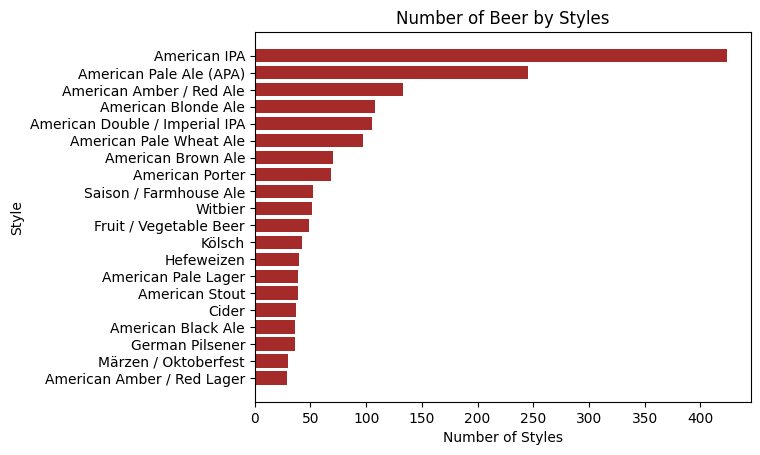

In [10]:
# make group by the styles
style_group = usbeer.groupby(by = "style")
style_count = style_group['style'].value_counts()
top_styles = style_count.nlargest(20).sort_values(ascending=True)

# Display the chart
plt.barh(top_styles.index, top_styles.values, color='brown')
plt.xlabel('Number of Styles')
plt.ylabel('Style')
plt.title('Number of Beer by Styles')

#### 2-2. Top 20 breweries producing the most types of beer

Text(0.5, 1.0, 'Number of Beer Types by breweries')

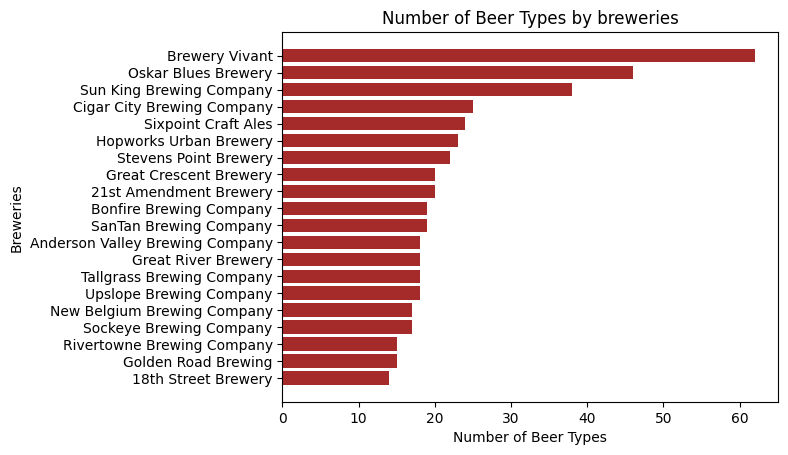

In [11]:
# make group by the breweries
brew_group = usbeer.groupby(by = "name_x")
brewery_count = brew_group['name_x'].value_counts()
top_breweries = brewery_count.nlargest(20).sort_values(ascending=True)

# Display the chart
plt.barh(top_breweries.index, top_breweries.values, color='brown')
plt.xlabel('Number of Beer Types')
plt.ylabel('Breweries')
plt.title('Number of Beer Types by breweries')

#### 2-3. Top 20 states with the most number of breweries

Text(0.5, 1.0, 'Number of Breweries by State')

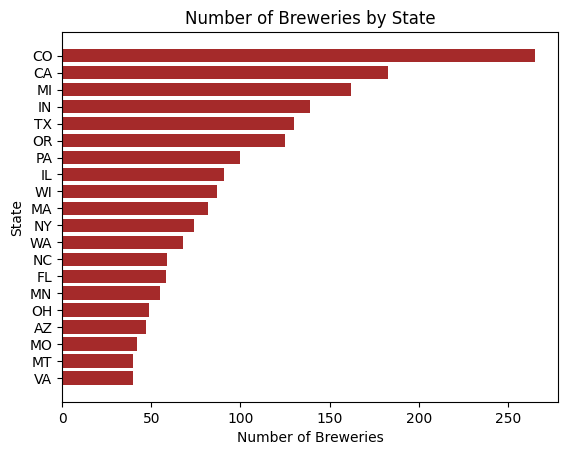

In [12]:
# In the same way, group by each state
region_group = usbeer.groupby(by = "state")
region_count = region_group['state'].value_counts()
top_region = region_count.nlargest(20).sort_values(ascending=True)

# Display the chart
plt.barh(top_region.index, top_region.values, color='brown')
plt.xlabel('Number of Breweries')
plt.ylabel('State')
plt.title('Number of Breweries by State')

### 2-4. Impact of IBU and ABV on different types of beer.

In [13]:
print(usbeer.ibu.describe())
print('-'*50)
print(usbeer.abv.describe())

count    2410.000000
mean       42.713167
std        19.813927
min         4.000000
25%        30.000000
50%        42.713167
75%        42.713167
max       138.000000
Name: ibu, dtype: float64
--------------------------------------------------
count    2410.000000
mean        0.059773
std         0.013366
min         0.001000
25%         0.050000
50%         0.057000
75%         0.067000
max         0.128000
Name: abv, dtype: float64


Text(0.5, 1.0, 'IBU and ABV')

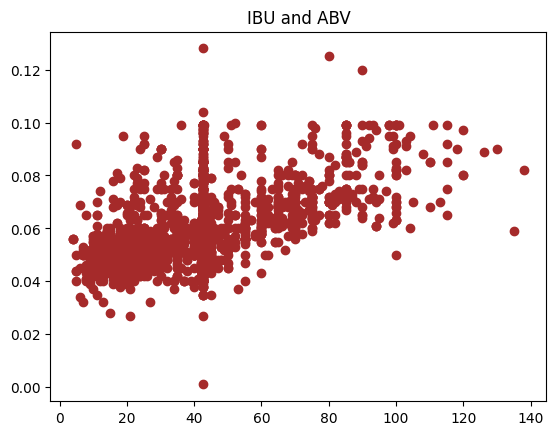

In [14]:
#  Let's check the scatter plot of bitterness and alcohol
plt.scatter("ibu", "abv", data = usbeer, color = 'brown')
plt.title("IBU and ABV")

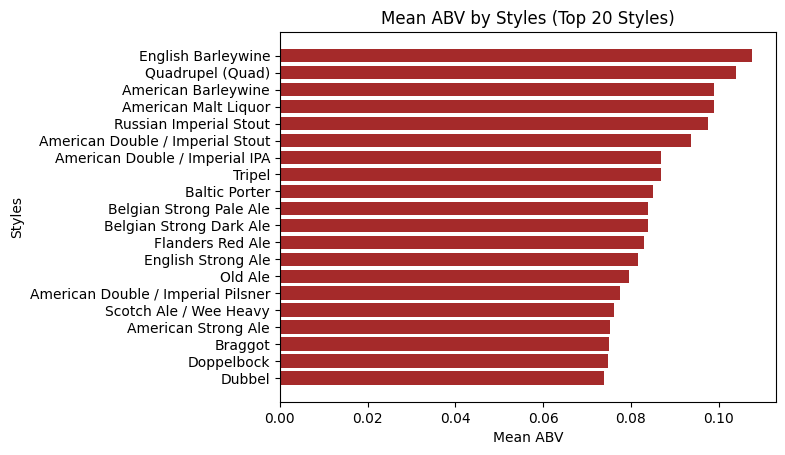

In [15]:
style_abv = usbeer.groupby('style')['abv'].mean()

top_styles_abv = style_abv.nlargest(20)
style_abv_map = dict(zip(top_styles_abv.index, top_styles_abv.values))
sorted_style_abv_map = sorted(style_abv_map.items(), key=lambda x: x[1])
sorted_styles = [item[0] for item in sorted_style_abv_map]
sorted_abv_values = [item[1] for item in sorted_style_abv_map]

plt.barh(sorted_styles, sorted_abv_values, color='brown')
plt.xlabel('Mean ABV')
plt.ylabel('Styles')
plt.title('Mean ABV by Styles (Top 20 Styles)')

plt.show()

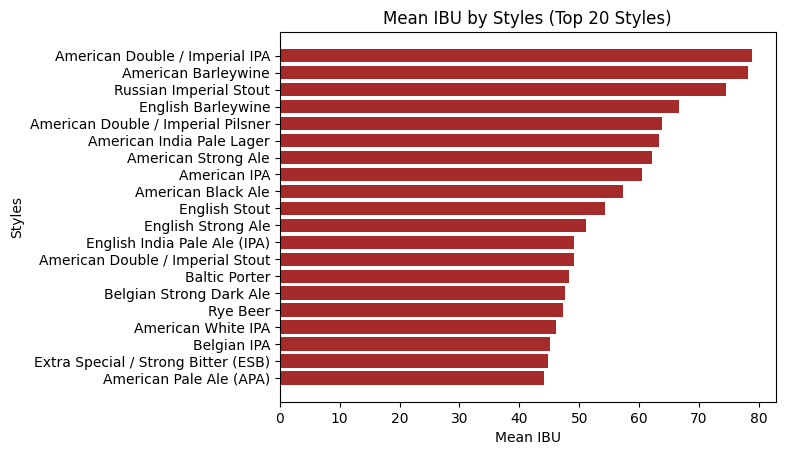

In [16]:
style_ibu = usbeer.groupby('style')['ibu'].mean()

top_styles_ibu = style_ibu.nlargest(20)
style_ibu_map = dict(zip(top_styles_ibu.index, top_styles_ibu.values))
ibu_map = sorted(style_ibu_map.items(), key=lambda x: x[1])
sorted_styles_ibu = [item[0] for item in ibu_map]
sorted_ibu_values = [item[1] for item in ibu_map]

plt.barh(sorted_styles_ibu, sorted_ibu_values, color='brown')
plt.xlabel('Mean IBU')
plt.ylabel('Styles')
plt.title('Mean IBU by Styles (Top 20 Styles)')

plt.show()
